# Project 2 – Exploring Students' Social Media Use and Well‑Being

**Student Name:** Manjil Rawal  
**Student ID:** @03086947  
**Course:** MATH 014 (04) – Introduction to Data Science Honors  
**Project:** Project 2 (Parts 1 & 2 Combined Notebook)  

**Dataset:** Students' Social Media Addiction  
**Source:** https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships  


## 1. Setup and Data Loading

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Load the dataset (same file used in Part 1)
df = pd.read_csv("Project_data.csv")
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


## 2. Data Understanding and Cleaning Summary (from Part 1)

### 2.1 Basic Structure: Rows, Columns, and First/Last Records

In [2]:

print("Shape (rows, columns):", df.shape)

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())


Shape (rows, columns): (705, 13)

First 5 rows:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7



Last 5 rows:


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


### 2.2 Column Names and Data Types

In [14]:

print("Column names:")
print(list(df.columns))

print("\nInfo summary:")
df.info()


Column names:
['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status', 'Conflicts_Over_Social_Media', 'Addicted_Score']

Info summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours

### 2.3 Summary Statistics for Numerical Columns

In [15]:

df.describe()


,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


### 2.4 Missing and Duplicate Data Check

In [16]:

missing = df.isna().sum().to_frame('missing_count')
missing['missing_%'] = (missing['missing_count'] / len(df) * 100).round(2)
print("Missing values by column:")
display(missing)

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Missing values by column:


,missing_count,missing_%
Student_ID,0,0.0
Age,0,0.0
Gender,0,0.0
Academic_Level,0,0.0
Country,0,0.0
Avg_Daily_Usage_Hours,0,0.0
Most_Used_Platform,0,0.0
Affects_Academic_Performance,0,0.0
Sleep_Hours_Per_Night,0,0.0
Mental_Health_Score,0,0.0


Number of duplicate rows: 0



### 2.5 Brief Cleaning Notes

- The dataset already appears **complete**: there are no missing values or duplicate rows.  
- Columns are correctly typed as numeric or categorical.  
- Because the data is already clean, no additional wrangling is required before visualization,  
  but we can still **create new derived columns** for analysis in Part 2.


## 3. Derived Feature for Conflicts Over Social Media


To make the *Conflicts_Over_Social_Media* variable easier to interpret, we create a new column  
called **`Conflict_Normalization`** that rescales conflicts to a 0–100 scale.


In [19]:
df_new = df.copy()

max_conflict = df_new["Conflicts_Over_Social_Media"].max()
df_new["Conflict_Normalization"] = (
    df_new["Conflicts_Over_Social_Media"] / max_conflict
) * 100

df_new[["Conflicts_Over_Social_Media", "Conflict_Normalization"]].head()

df_new.to_csv("Project_data_cleaned.csv", index=False)
print("Cleaned data saved as Project_data_cleaned.csv")

Cleaned data saved as Project_data_cleaned.csv


## 4. SECTION I – Individual, Comparative, and Grouped Visualizations


### 4.1 Histogram of Average Daily Usage Hours

This histogram shows the distribution of students' average daily social media usage (in hours).  
It reveals how usage is spread across the sample.


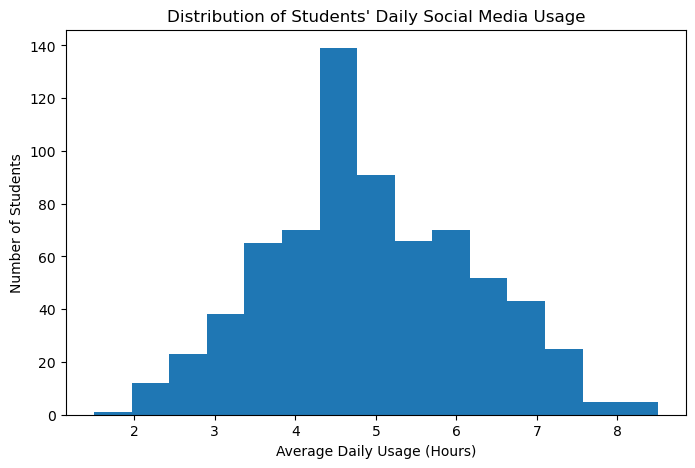

In [7]:

plt.figure(figsize=(8,5))
plt.hist(df_new["Avg_Daily_Usage_Hours"], bins=15)
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Number of Students")
plt.title("Distribution of Students' Daily Social Media Usage")
plt.show()



**Interpretation:**  
Most students use social media between **4 and 7 hours per day**.  
There are relatively few students at the extreme low or high ends, which suggests that heavy usage  
is common in this sample and may be part of students' daily routines.



### 4.2 Bar Chart of Most Used Platforms

This bar chart shows how many students selected each platform as their **most used** social media app.


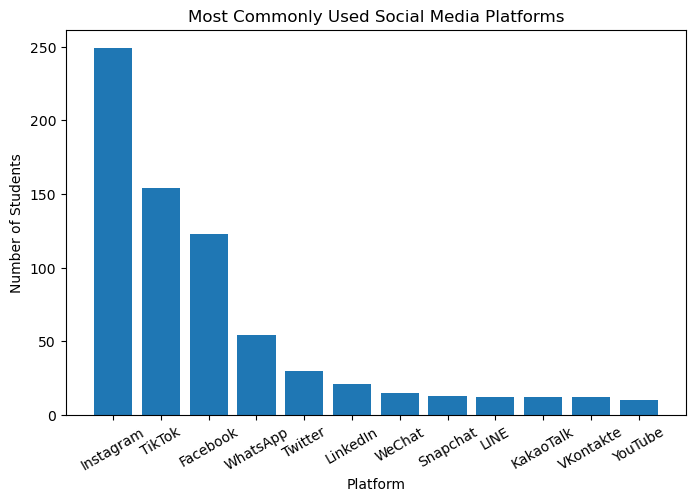

In [8]:

platform_counts = df_new["Most_Used_Platform"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel("Platform")
plt.ylabel("Number of Students")
plt.title("Most Commonly Used Social Media Platforms")
plt.xticks(rotation=30)
plt.show()



**Interpretation:**  
A small number of platforms (such as Instagram, TikTok, and YouTube) are used by most students.  
These dominant platforms likely contribute the most to overall screen time and may be a key focus  
when studying addictive behaviors or conflicts related to social media.



### 4.3 Count Plot of Academic Impact

Here we examine how many students report that social media **affects their academic performance**.


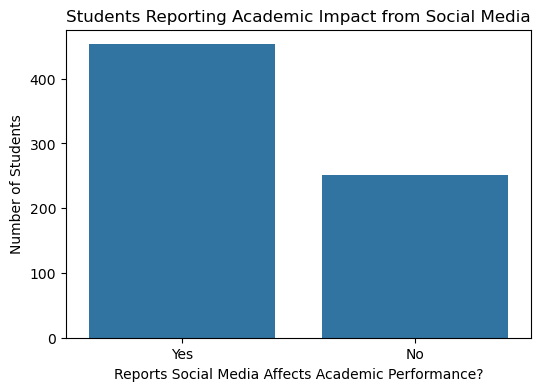

In [9]:

plt.figure(figsize=(6,4))
sns.countplot(x="Affects_Academic_Performance", data=df_new)
plt.xlabel("Reports Social Media Affects Academic Performance?")
plt.ylabel("Number of Students")
plt.title("Students Reporting Academic Impact from Social Media")
plt.show()



**Interpretation:**  
This visualization shows the frequency of "Yes" versus "No" responses.  
If significantly more students select **"Yes"**, it supports the concern that social media use  
may interfere with academic work for many students.



### 4.4 Grouped Comparison – Average Usage Hours by Gender

Using `.groupby()`, we compare **average daily usage hours** across gender categories.  
This helps us identify whether certain groups spend more time on social media.


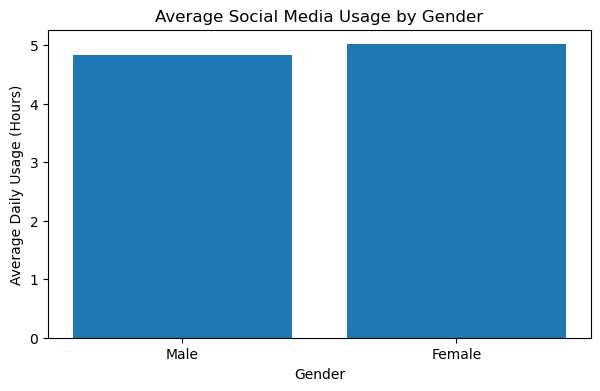

Gender
Male      4.826136
Female    5.011048
Name: Avg_Daily_Usage_Hours, dtype: float64

In [10]:

usage_by_gender = df_new.groupby("Gender")["Avg_Daily_Usage_Hours"].mean().sort_values()

plt.figure(figsize=(7,4))
plt.bar(usage_by_gender.index, usage_by_gender.values)
plt.xlabel("Gender")
plt.ylabel("Average Daily Usage (Hours)")
plt.title("Average Social Media Usage by Gender")
plt.show()

usage_by_gender



**Interpretation:**  
The bar plot shows how average usage differs by gender.  
Any visible differences may point to groups that are **more heavily engaged** with social media,  
which could be important when considering targeted interventions or further analysis by subgroup.


## 5. SECTION II – Relationship Visualizations


### 5.1 Scatter Plot – Daily Usage vs. Mental Health Score

We explore the relationship between **daily social media usage** and **mental health score**.  
This scatter plot helps us see whether higher usage is associated with higher or lower mental health.


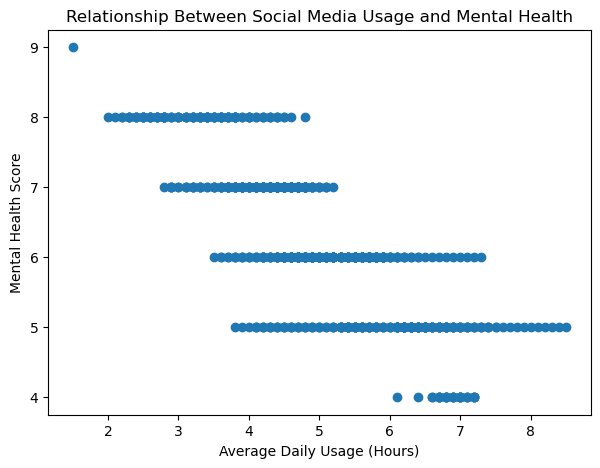

In [11]:

plt.figure(figsize=(7,5))
plt.scatter(df_new["Avg_Daily_Usage_Hours"], df_new["Mental_Health_Score"])
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Mental Health Score")
plt.title("Relationship Between Social Media Usage and Mental Health")
plt.show()



**Interpretation:**  
The scatter plot shows how mental health scores are distributed over different levels of usage.  
If points with higher usage hours tend to cluster around **lower mental health scores**, that would suggest  
a negative relationship; if there is no clear pattern, the relationship may be weak or influenced by other factors.



### 5.2 Correlation Heatmap of Numeric Variables

To see broader relationships across all numerical variables, we compute a **correlation matrix**  
and display it as a heatmap.


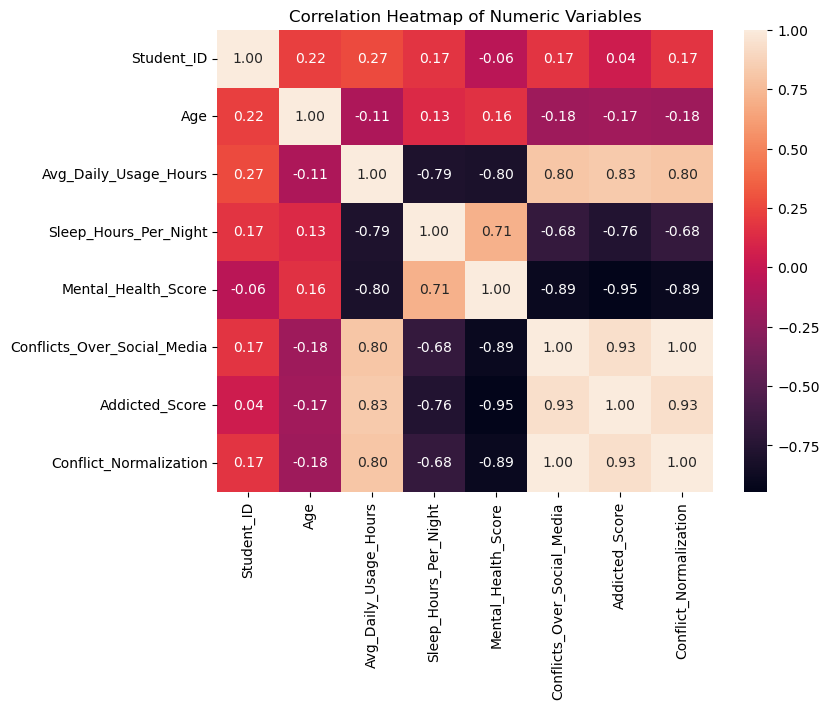

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Conflict_Normalization
Student_ID,1.000000,0.222306,0.267524,0.173793,-0.055037,0.173258,0.041637,0.173258
Age,0.222306,1.000000,-0.113682,0.125265,0.160278,-0.184482,-0.166396,-0.184482
Avg_Daily_Usage_Hours,0.267524,-0.113682,1.000000,-0.790582,-0.801058,0.804582,0.832000,0.804582
Sleep_Hours_Per_Night,0.173793,0.125265,-0.790582,1.000000,0.707439,-0.677266,-0.764858,-0.677266
Mental_Health_Score,-0.055037,0.160278,-0.801058,0.707439,1.000000,-0.893572,-0.945051,-0.893572
Conflicts_Over_Social_Media,0.173258,-0.184482,0.804582,-0.677266,-0.893572,1.000000,0.933586,1.000000
Addicted_Score,0.041637,-0.166396,0.832000,-0.764858,-0.945051,0.933586,1.000000,0.933586
Conflict_Normalization,0.173258,-0.184482,0.804582,-0.677266,-0.893572,1.000000,0.933586,1.000000


In [12]:

numeric_df = df_new.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

corr



**Interpretation:**  
The heatmap shows correlation values between pairs of numerical variables (from **-1** to **1**).  

- Values close to **1** indicate strong positive relationships.  
- Values close to **-1** indicate strong negative relationships.  
- Values near **0** indicate little linear relationship.  

By focusing on variables like **Addicted_Score**, **Conflicts_Over_Social_Media**, and **Sleep_Hours_Per_Night**,  
we can see whether higher addiction scores are connected to more conflicts or reduced sleep.



## 6. Final Summary and Insights

From these visualizations, several key themes emerge:

1. **High Levels of Daily Usage**  
   - Many students spend **4–7 hours per day** on social media, which is a substantial portion of their free time.  

2. **Dominant Platforms**  
   - A small number of platforms (especially Instagram, TikTok, and YouTube) are used by most students.  
   - These platforms likely drive much of the observed screen time and potential addiction.

3. **Perceived Academic Impact**  
   - The count plot indicates how many students feel their academic performance is affected.  
   - If "Yes" responses are high, this provides evidence for further investigation into productivity and grades.

4. **Group Differences**  
   - Average usage by gender shows small but noticeable differences, suggesting that some groups may be more exposed  
     to the risks of heavy social media use.

5. **Relationships Among Variables**  
   - The scatter plot between usage and mental health shows how well-being scores vary with screen time.  
   - The correlation heatmap highlights links between addiction scores, conflicts, sleep, and mental health,  
     which can motivate more detailed statistical modeling in future work.

These results support the overall objective: to understand how students' social media habits connect to  
their well-being, relationships, and academic life.
